Project Overview

Find a dataset to make predictions on [X]
https://www.kaggle.com/nareshbhat/health-care-data-set-on-heart-attack-possibility
https://archive.ics.uci.edu/ml/datasets/Heart+Disease

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date.The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no/less chance of heart attack and 1 = more chance of heart attack

Attribute Information
1) age
2) sex
3) chest pain type (4 values)
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic
4) resting blood pressure
5) serum cholestoral in mg/dl
6) fasting blood sugar > 120 mg/dl
7) resting electrocardiographic results (values 0,1,2)
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8) maximum heart rate achieved
9) exercise induced angina
10) oldpeak = ST depression induced by exercise relative to rest
11) the slope of the peak exercise ST segment
12) number of major vessels (0-3) colored by flourosopy
13) thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14) target: 0= less chance of heart attack 1= more chance of heart attack

EDA using seaborn
   
Impute and get dummy values for categorical features

Train/CV/Test split

Fit LR model to data

Fit SVM model to data
 -Grid Search
Compare performance
- Classification Report
- Confusion Matrix

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Read dataset
bunglor = pd.read_csv('heart.csv')

EDA

In [5]:
bunglor.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
bunglor.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Is the data on a similar scale?

In [7]:
bunglor.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [15]:
bunglor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


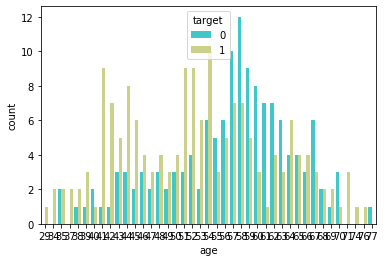

In [14]:
sns.countplot(x='age',hue='target',data=bunglor,palette='rainbow')

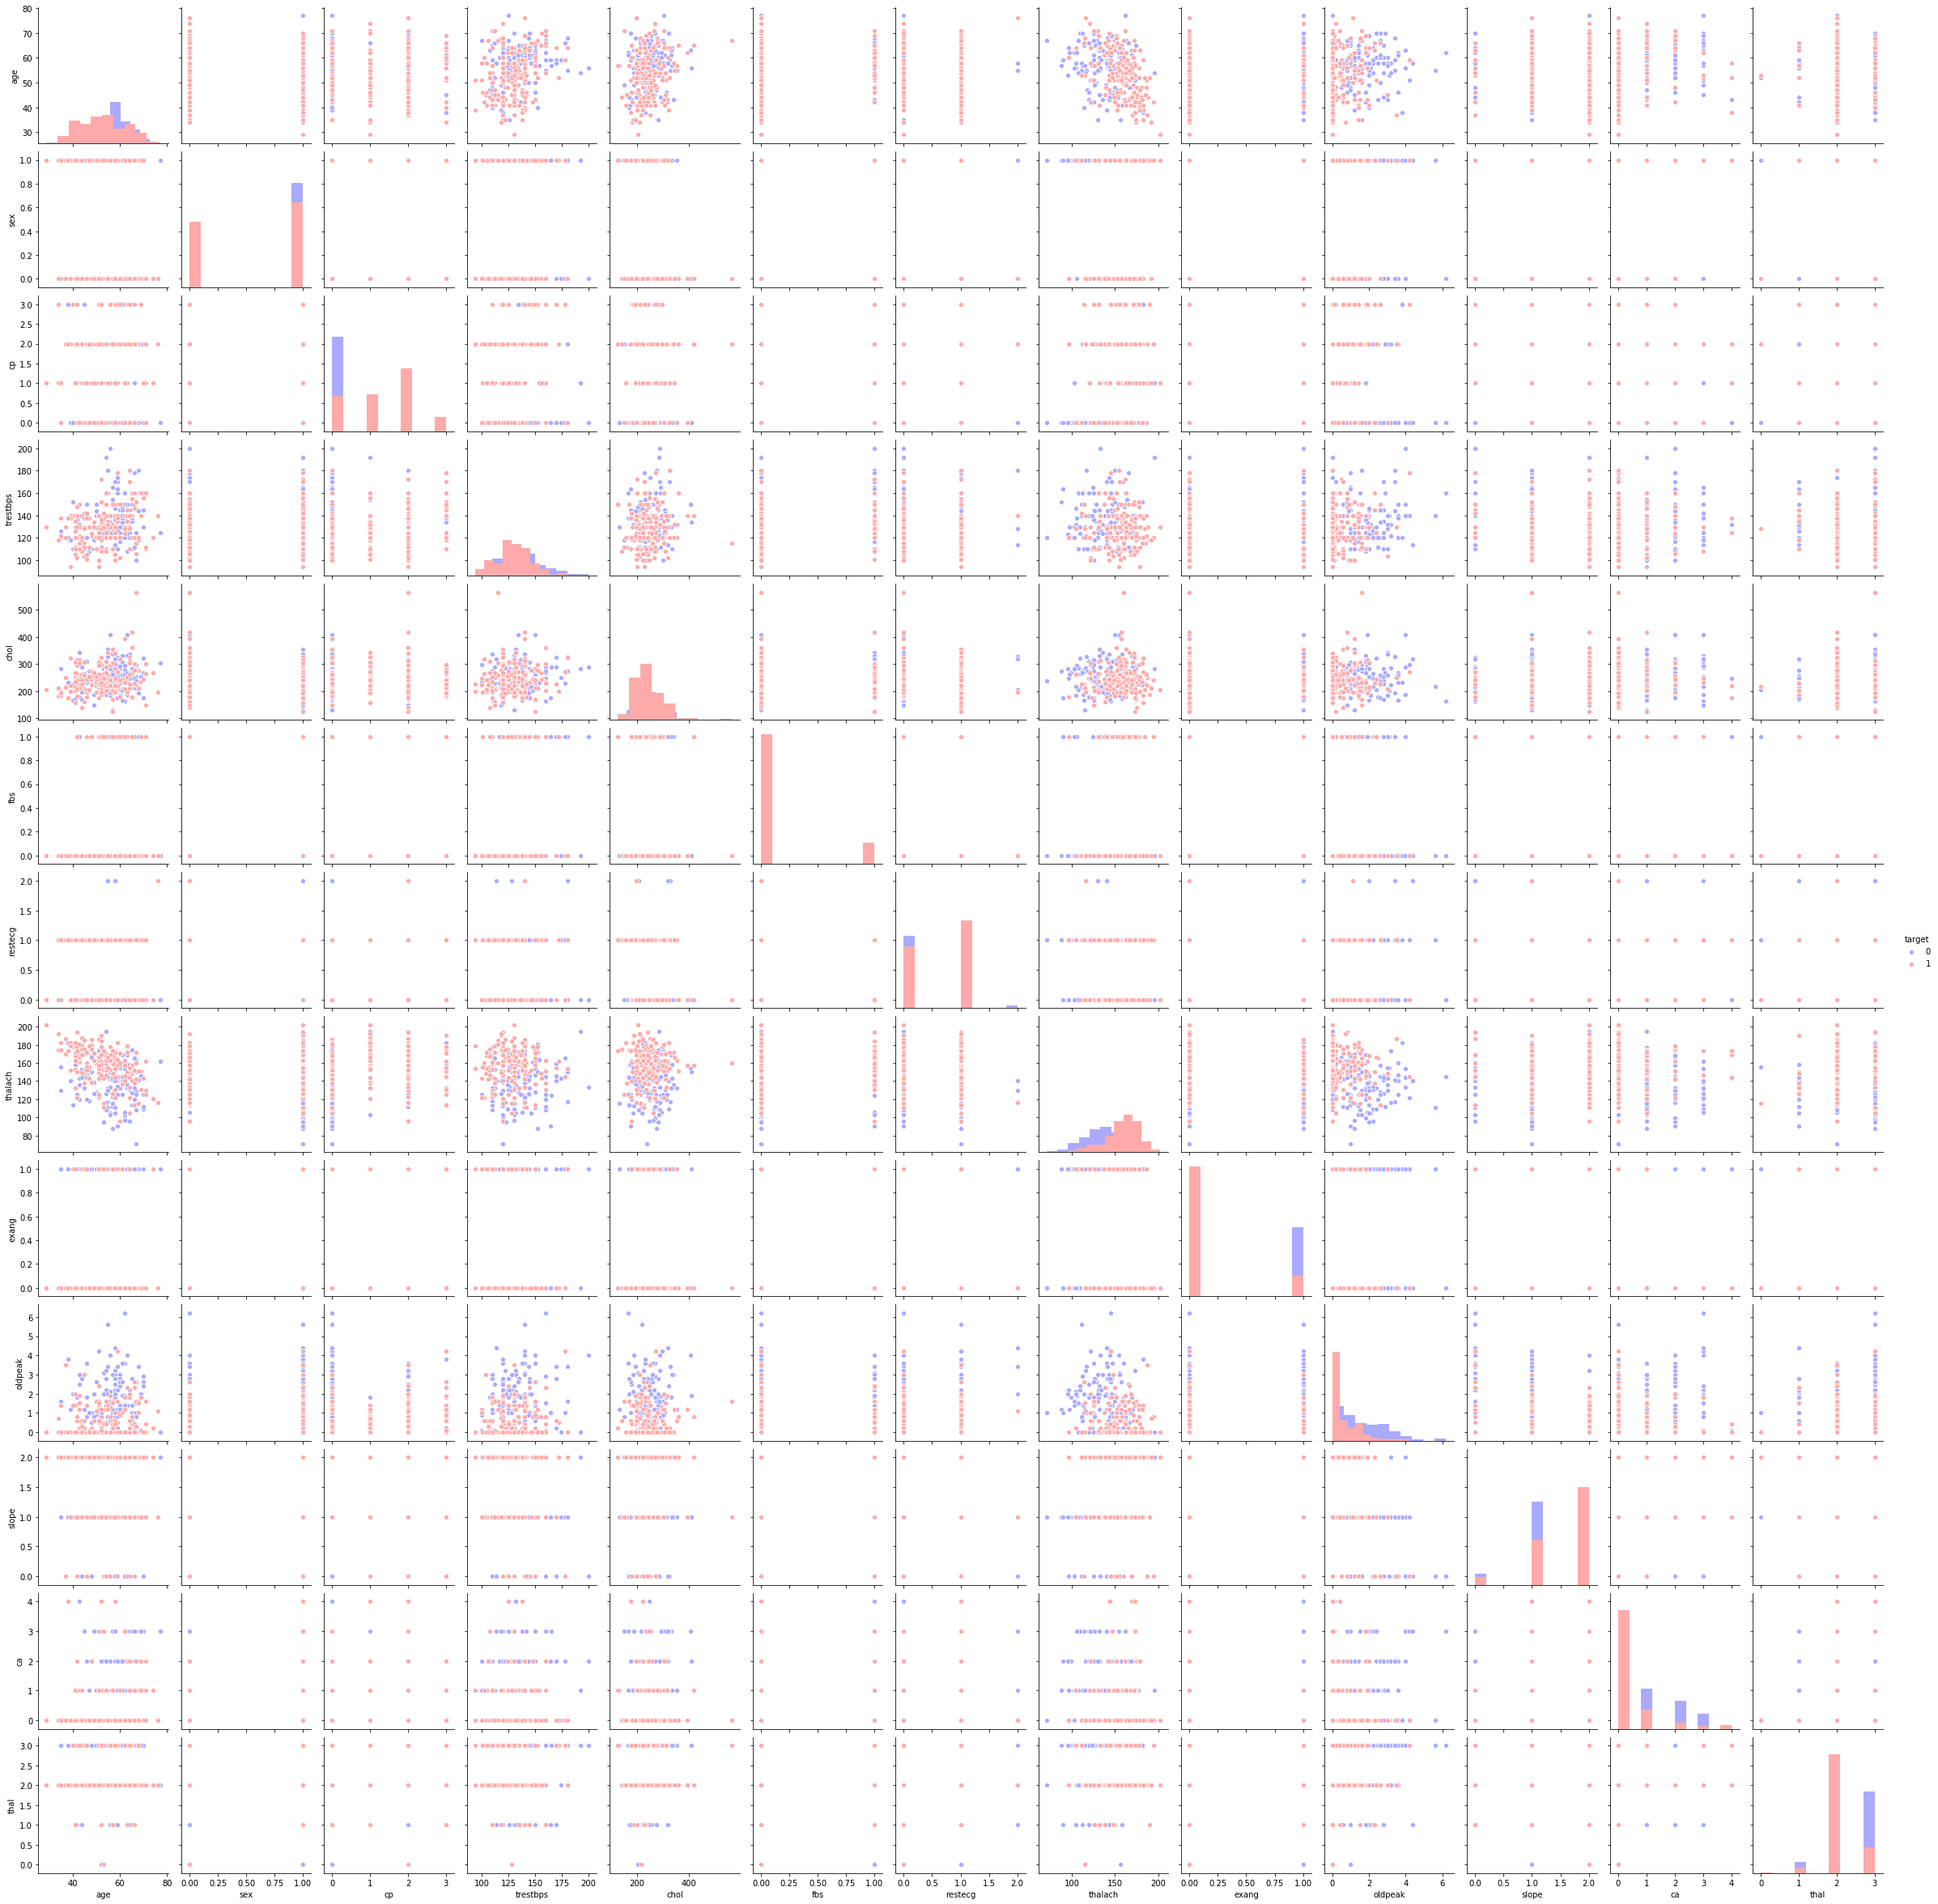

In [17]:
sns.pairplot(bunglor,hue='target',palette='bwr',diag_kind = 'hist')

Create dummy variables from categorical features & fix erroneous data

In [3]:
#Change erroneous zeros to ones
bunglor['thal'].replace(0,1, inplace = True)

In [4]:
chest_pain = pd.get_dummies(bunglor['cp'])
chest_pain.columns = ['typical angina','atypical angina','non-anginal pain','asymptomatic']
chest_pain.drop(['asymptomatic'],axis=1,inplace=True)

ECG =pd.get_dummies(bunglor['restecg'],drop_first=True)
ECG.columns = ['ST-T wave abnormality','left ventricular hypertrophy']

thal = pd.get_dummies(bunglor['thal'],drop_first=True)
thal.columns = ['Fixed Defect','Reversible Defect']

In [5]:
#Merge all new features
bunglor = pd.concat([bunglor,chest_pain,ECG, thal],axis=1)
#Drop old columns 
bunglor.drop(['cp','restecg','thal'],axis =1, inplace =True)

Create dummy variables based on chest pain types

In [3]:
chest_pain = pd.get_dummies(bunglor['cp'])

In [4]:
chest_pain.columns = ['typical angina','atypical angina','non-anginal pain','asymptomatic']

In [5]:
chest_pain

,typical angina,atypical angina,non-anginal pain,asymptomatic
0,0,0,0,1
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,1,0,0,0
...,...,...,...,...
298,1,0,0,0
299,0,0,0,1
300,1,0,0,0
301,1,0,0,0


In [6]:
chest_pain.drop(['asymptomatic'],axis=1,inplace=True)
#Rather than using the parameter dropfirst, I instead manually dropped the "asymptomatic" column, 
#although it shouldn't matter which... right?

In [27]:
bunglor

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,typical angina,atypical angina,non-anginal pain
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0,0,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,1,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,1,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,1,0,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,0,0,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,1,0,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,1,0,0


Create dummy variables based on ECG

In [7]:
ECG =pd.get_dummies(bunglor['restecg'],drop_first=True)

In [8]:
ECG.columns = ['ST-T wave abnormality','left ventricular hypertrophy']

In [9]:
ECG

,ST-T wave abnormality,left ventricular hypertrophy
0,0,0
1,1,0
2,0,0
3,1,0
4,1,0
...,...,...
298,1,0
299,1,0
300,1,0
301,1,0


In [10]:
bunglor

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,typical angina,atypical angina,non-anginal pain,ST-T wave abnormality,left ventricular hypertrophy
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0,0,0,0,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,0,1,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,1,0,0,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,1,0,1,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,1,0,0,1,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,0,0,0,1,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,1,0,0,1,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,1,0,0,1,0


Impute thal value for erroneous entry

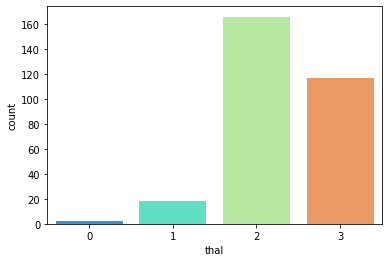

In [9]:
sns.countplot(x='thal',data=bunglor,palette='rainbow')

Turn each 0 into a 1. Then use get_dummies

In [ ]:
bunglor['thal'] = bunglor[bunglor['thal']==0].apply

In [6]:
bunglor[bunglor['thal']==0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [4]:
bunglor[bunglor['thal']==0] = bunglor[bunglor['thal']==0].apply(lambda X: 1)
#how do i save this change?

bunglor = bunglor[bunglor['thal']==0].apply(lambda X: 1)

age         1
sex         1
cp          1
trestbps    1
chol        1
fbs         1
restecg     1
thalach     1
exang       1
oldpeak     1
slope       1
ca          1
thal        1
target      1
dtype: int64

In [12]:
def bungo(var):
    if var == 0:
        return 1
    #what if i just say var = 1 here?
    else: return var
    #is this the only way to leave var unchanged?

In [17]:
bunglor = bunglor['thal'].apply(bungo)

In [9]:
#Change erroneous zeros to ones
bunglor['thal'].replace(0,1, inplace = True)

In [11]:
bunglor['thal']

0      1
1      2
2      2
3      2
4      2
      ..
298    3
299    3
300    3
301    3
302    2
Name: thal, Length: 303, dtype: int64

pandas where
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.where.html#pandas.DataFrame.where

In [10]:
#Get dummy values
thal = pd.get_dummies(bunglor['thal'],drop_first=True)

In [11]:
thal.columns = ['Fixed Defect','Reversible Defect']

In [14]:
thal

,Fixed Defect,Reversible Defect
0,0,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
298,0,1
299,0,1
300,0,1
301,0,1


In [12]:
#Merge all new features
bunglor = pd.concat([bunglor,chest_pain,ECG, thal],axis=1)

In [13]:
bunglor

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,ca,thal,target,typical angina,atypical angina,non-anginal pain,ST-T wave abnormality,left ventricular hypertrophy,Fixed Defect,Reversible Defect
0,63,1,3,145,233,1,0,150,0,2.3,...,0,1,1,0,0,0,0,0,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,2,1,0,0,1,1,0,1,0
2,41,0,1,130,204,0,0,172,0,1.4,...,0,2,1,0,1,0,0,0,1,0
3,56,1,1,120,236,0,1,178,0,0.8,...,0,2,1,0,1,0,1,0,1,0
4,57,0,0,120,354,0,1,163,1,0.6,...,0,2,1,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,...,0,3,0,1,0,0,1,0,0,1
299,45,1,3,110,264,0,1,132,0,1.2,...,0,3,0,0,0,0,1,0,0,1
300,68,1,0,144,193,1,1,141,0,3.4,...,2,3,0,1,0,0,1,0,0,1
301,57,1,0,130,131,0,1,115,1,1.2,...,1,3,0,1,0,0,1,0,0,1


In [14]:
#Drop old columns 
bunglor.drop(['cp','restecg','thal'],axis =1, inplace =True)

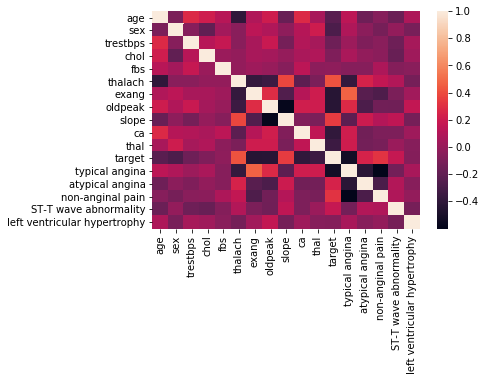

In [13]:
sns.heatmap(bunglor.corr())

Logistic Regression

Train-Test Split
Try Train-CV-Test Split?

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(bunglor.drop('target',axis=1), 
                                                    bunglor['target'], test_size=0.30, 
                                                    random_state=101)

Normalize / Scale data

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
#try with normalization inside the split statement
#only need to apply it to x?
X_train, X_test, y_train, y_test = train_test_split(StandardScaler().fit_transform(bunglor.drop('target',axis=1)), 
                                                    bunglor['target'], test_size=0.30, 
                                                    random_state=101)

In [ ]:
#do this before train test split?
scaler = preprocessing.StandardScaler().fit(X_train)

In [ ]:
StandardScaler().fit_transform(X)

Training

In [17]:
from sklearn.linear_model import LogisticRegression

In [24]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

As is, the model fails to converge. Try the following:
    - Raise iterations. [X] 1000 and 10000 iterations fixes convergence with same performance
    - Use standard scaler. [X] fixes convergence
    - Try different solver. 
Other considerations:
    - Try LogisticRegressionCV or KFold to implement cross-validation and fit regularization parameter as well as l1_ratios (?)
    - "Dual" parameter for when n_examples < n_features
    - "Saga" solver for large datasets

In [18]:
logmodel = LogisticRegression(max_iter = 1000)
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Predicting

In [19]:
predictions = logmodel.predict(X_test)

Evaluation
- Classification Report
- Area Under the ROC curve

In [9]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
#result with StandardScaler applied
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85        44
           1       0.84      0.89      0.87        47

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91



In [23]:
#result with iterations raised to 10000
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84        44
           1       0.84      0.87      0.85        47

    accuracy                           0.85        91
   macro avg       0.85      0.85      0.85        91
weighted avg       0.85      0.85      0.85        91



In [21]:
#result with iterations raised to 1000
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84        44
           1       0.84      0.87      0.85        47

    accuracy                           0.85        91
   macro avg       0.85      0.85      0.85        91
weighted avg       0.85      0.85      0.85        91



Support Vector Classifier

In [10]:
from sklearn.svm import SVC

In [12]:
svModel = SVC()

In [13]:
svModel.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [14]:
predictions = svModel.predict(X_test)

Evaluation

In [16]:
#No feature scaling
print(confusion_matrix(y_test,predictions))

[[20 24]
 [ 6 41]]


In [17]:
#No feature scaling
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.45      0.57        44
           1       0.63      0.87      0.73        47

    accuracy                           0.67        91
   macro avg       0.70      0.66      0.65        91
weighted avg       0.70      0.67      0.65        91



In [15]:
#Feature scaling
print(confusion_matrix(y_test,predictions))

[[34 10]
 [ 6 41]]


In [16]:
#Feature scaling
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81        44
           1       0.80      0.87      0.84        47

    accuracy                           0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



Grid Search

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
param_grid = {'gamma': [.005,.001,.0005]} 

In [13]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [14]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] gamma=0.005 .....................................................
[CV] ......................... gamma=0.005, score=0.814, total=   0.0s
[CV] gamma=0.005 .....................................................
[CV] ......................... gamma=0.005, score=0.860, total=   0.0s
[CV] gamma=0.005 .....................................................
[CV] ......................... gamma=0.005, score=0.881, total=   0.0s
[CV] gamma=0.005 .....................................................
[CV] ......................... gamma=0.005, score=0.667, total=   0.0s
[CV] gamma=0.005 .....................................................
[CV] ......................... gamma=0.005, score=0.905, total=   0.0s
[CV] gamma=0.001 .....................................................
[CV] ......................... gamma=0.001, score=0.814, total=   0.0s
[CV] gamma=0.001 .....................................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'gamma': [0.005, 0.001, 0.0005]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [15]:
grid_predictions = grid.predict(X_test)

In [16]:
grid.best_params_

{'gamma': 0.005}

In [17]:
grid.best_estimator_

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [19]:
#feature scaling and grid search
#{'C': 1, 'gamma': 0.001}
print(confusion_matrix(y_test,grid_predictions))

[[34 10]
 [ 5 42]]


In [20]:
#feature scaling and grid search
#{'C': 1, 'gamma': 0.001}
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82        44
           1       0.81      0.89      0.85        47

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91



In [18]:
#feature scaling and grid search
#{'C': 1, 'gamma': 0.005}
print(confusion_matrix(y_test,grid_predictions))

[[36  8]
 [ 5 42]]


In [19]:
#feature scaling and grid search
#{'C': 1, 'gamma': 0.005}
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85        44
           1       0.84      0.89      0.87        47

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91



Insights:
- Default C value (1) worked best
- Low Gamma value worked best
I managed to increase f1 score from .57 to .85 through feature scaling and hyperparameter tuning via grid search